### Seldom lithologies

There are a few relatively seldom and/or outspoken lithologies where deterministic checks coudl help improving the prediction success-rate

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
%run PLOTTING_FUNCTIONS.ipynb

In [3]:
%run COSMETICS_DICTIONARIES.ipynb

In [4]:
%run SOME_PREPROCESSING.ipynb

In [5]:
print(f'The number of datapoints ("rows") per lithology\n{"-"*47}')
for l in litho_dict.keys():
    print(f'{litho_dict[l][0]:>18}:{sum(df.FORCE_2020_LITHOFACIES_LITHOLOGY==l):>8}')

The number of datapoints ("rows") per lithology
-----------------------------------------------
         Sandstone:  168937
             Shale:  720803
   Sandstone/Shale:  150455
         Limestone:   56320
             Chalk:   10513
          Dolomite:    1688
              Marl:   33329
         Anhydrite:    1085
            Halite:    8213
              Coal:    3820
          Basement:     103
              Tuff:   15245


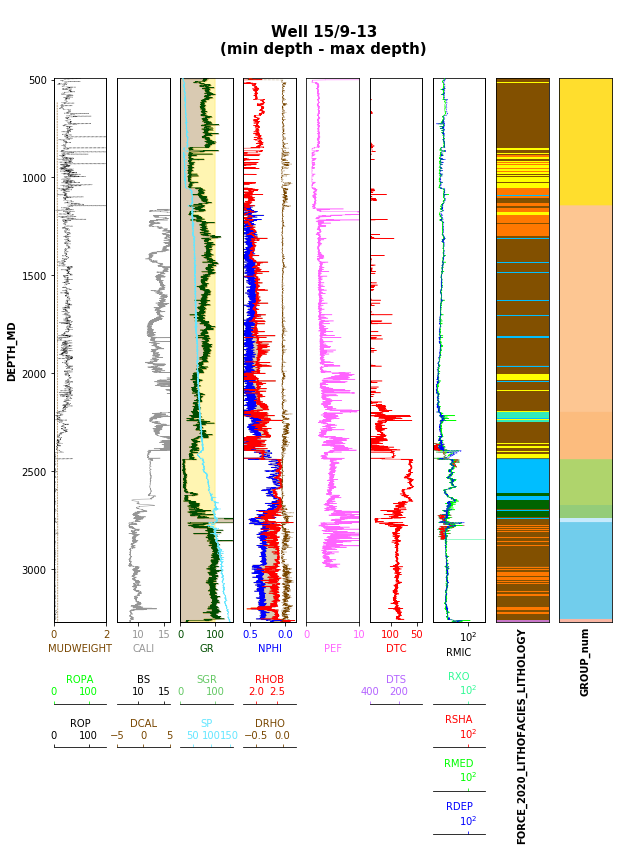

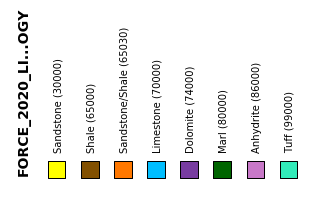

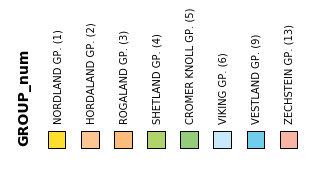

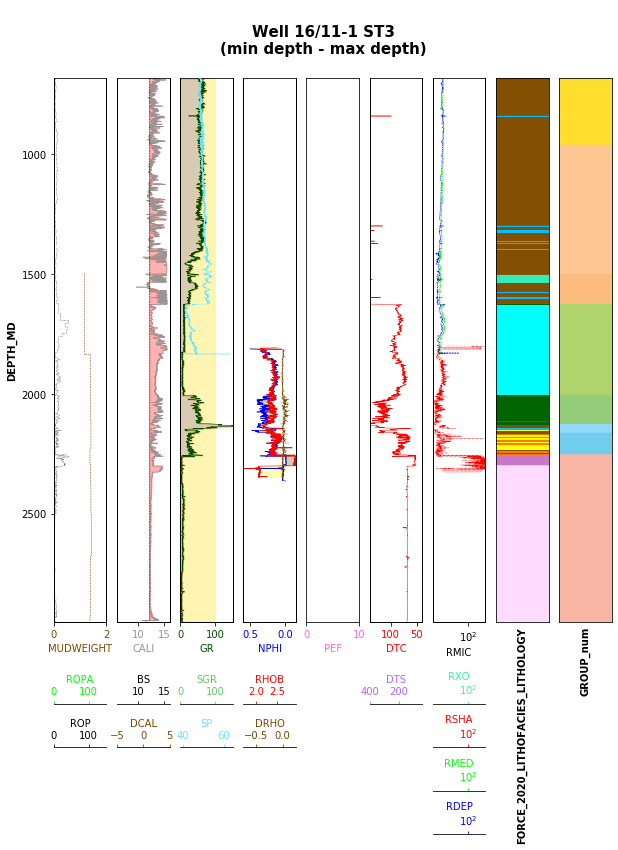

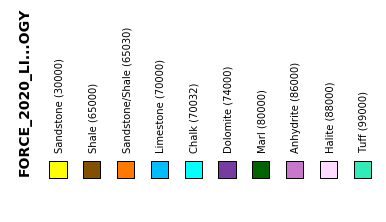

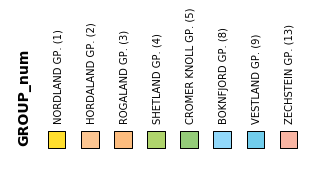

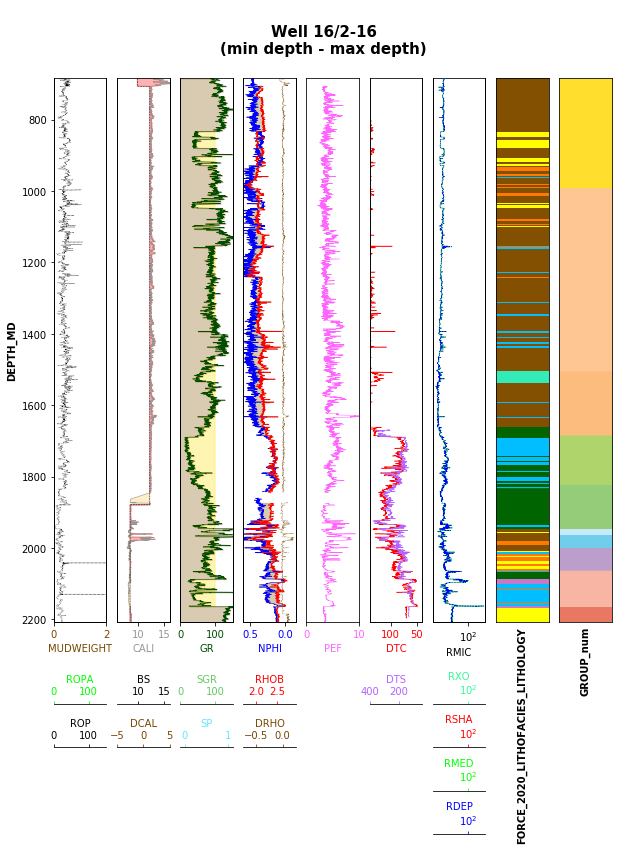

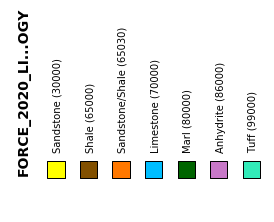

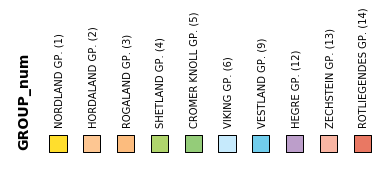

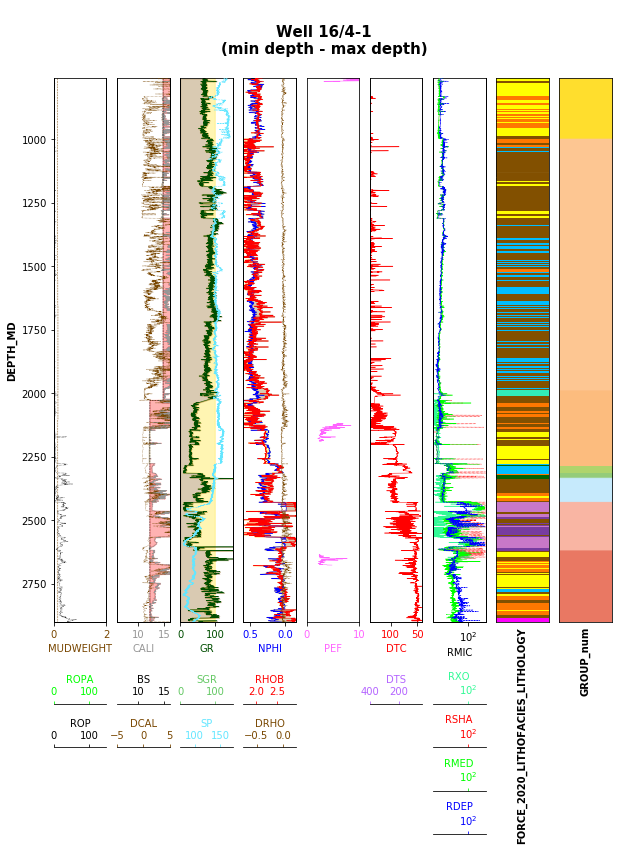

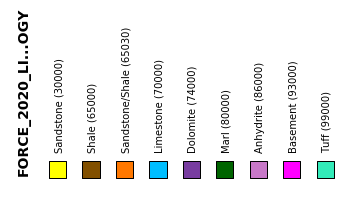

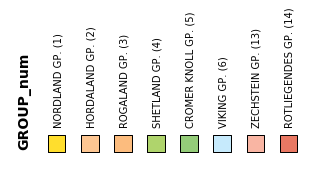

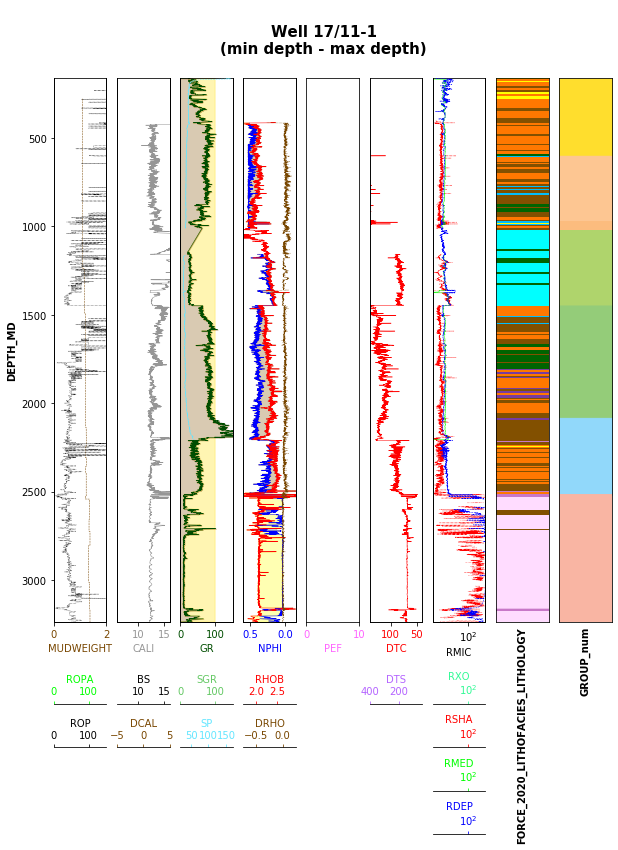

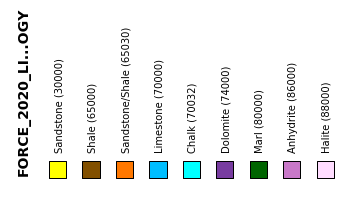

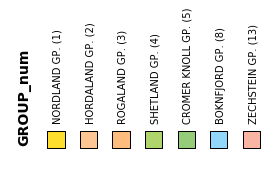

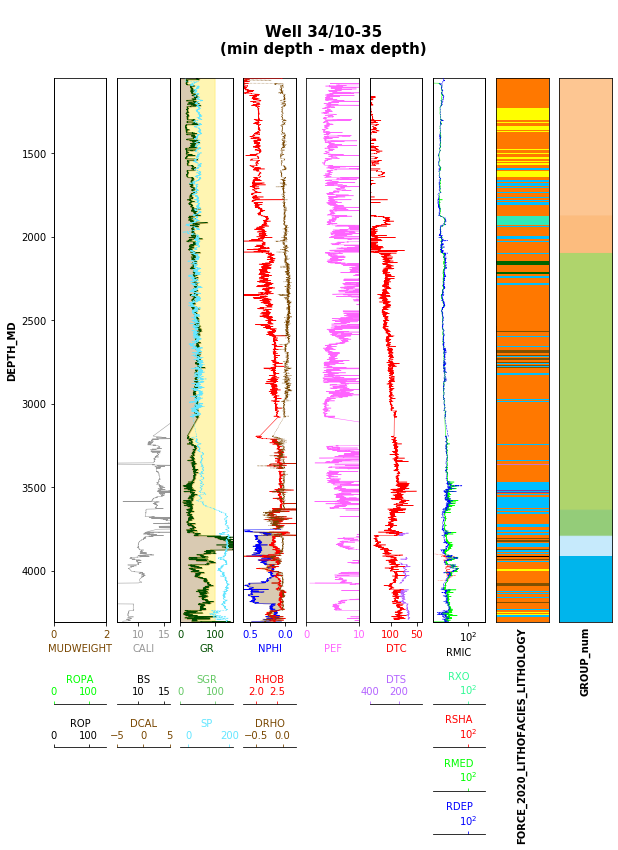

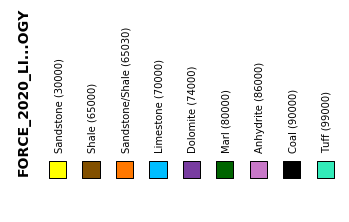

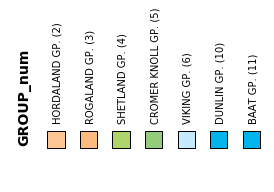

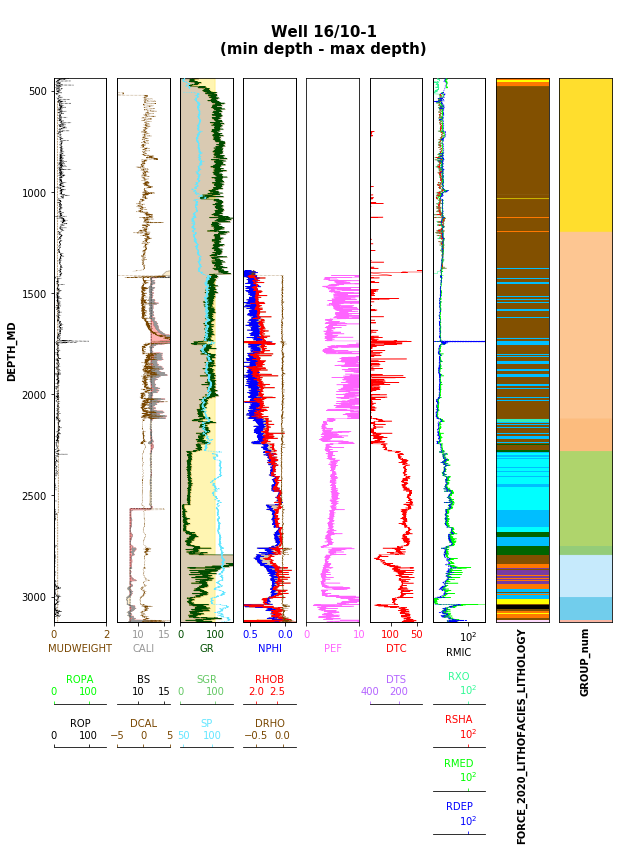

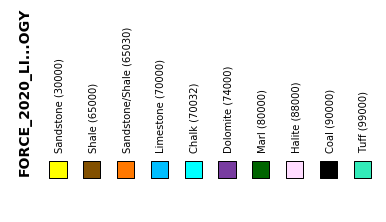

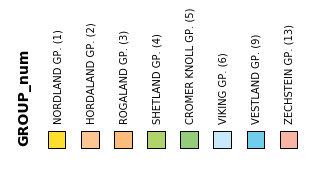

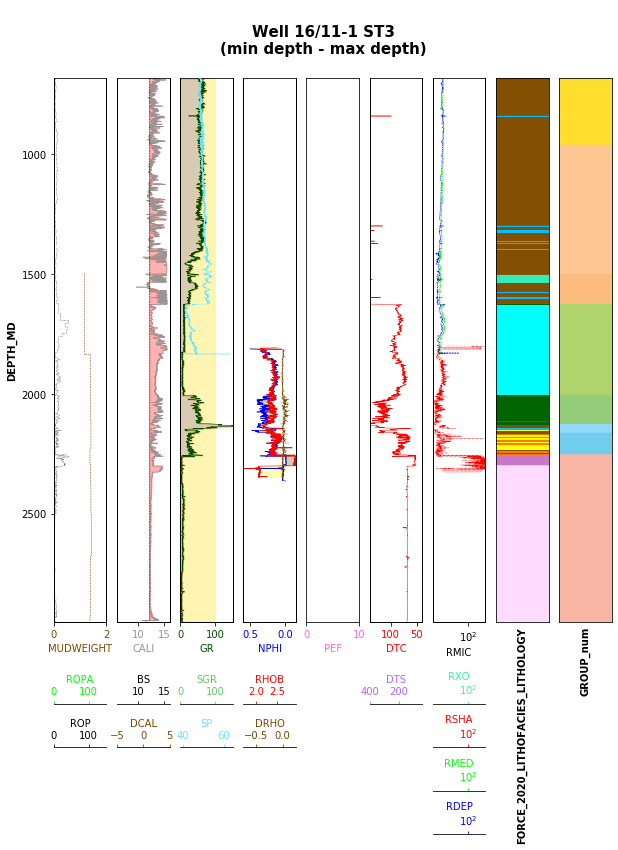

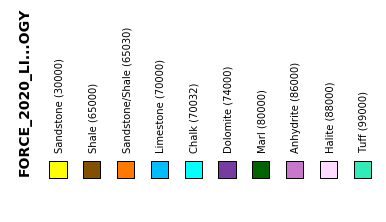

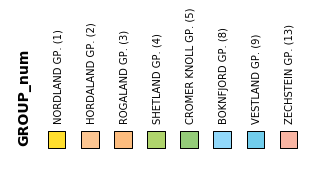

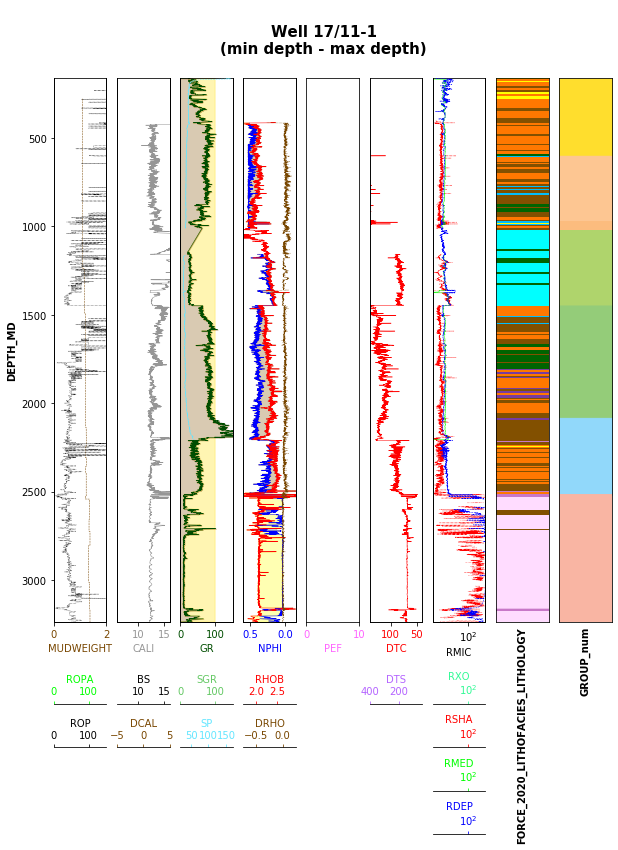

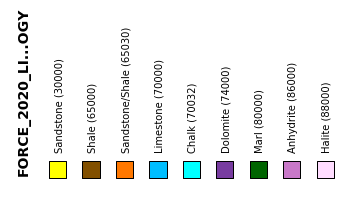

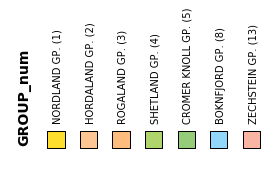

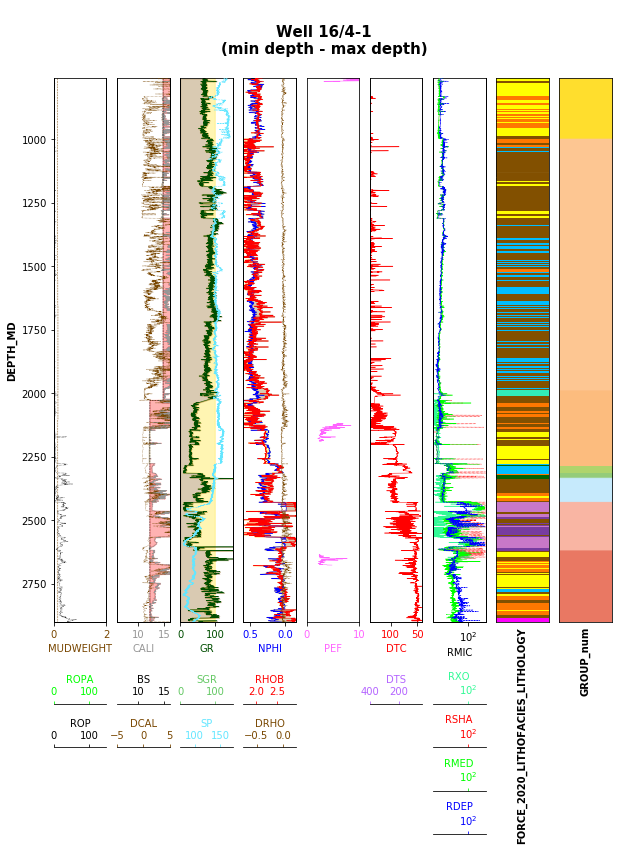

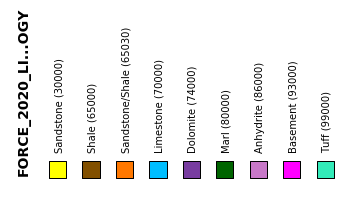

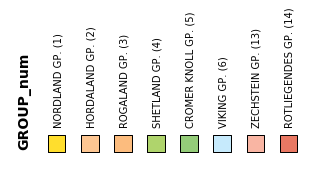

In [6]:
wells_anhydrite = ['15/9-13', '16/11-1 ST3', '16/2-16', '16/4-1', '17/11-1', '34/10-35']
wells_halite = ['16/10-1', '16/11-1 ST3', '17/11-1']
wells_basement = ['16/4-1']

wells = wells_anhydrite + wells_halite + wells_basement

logs = ['DEPTH_MD', 'GR', 'RHOB', 'NPHI', 'RDEP', 'PEF', 'RDEP', 'FORCE_2020_LITHOFACIES_LITHOLOGY', 'GROUP']
litho_colors = [f[1] for f in litho_dict.values()]

for well in wells:
    data = df[df.WELL==well]
    #md_min = max(data.DEPTH_MD)
    #md_max = max(data.DEPTH_MD)
    #data = df.loc[:,logs][df.WELL==well][df.DEPTH_MD>=md_min][df.DEPTH_MD<=md_max]
    create_CPI(data, well, 'DEPTH_MD', log_dict, top_depth=None, bottom_depth=None,
               log_shading_dict=log_shading_dict,
               plot_litho={'FORCE_2020_LITHOFACIES_LITHOLOGY': litho_dict, 'GROUP_num':group_dict},
               plot_full_litho_legend=False, scaled_plot=False)

The most obvious of these lithologies are:
    - anhydrite
    - halite
    - coal
    - basement
Let's get some statistics:

In [7]:
seldom_lithologies = [86000, 88000, 90000, 93000]

In [8]:
for l in seldom_lithologies:
    print(f'{("*"+litho_dict[l][0]+"*"):>12} occurs in GROUPs: {", ".join(df.GROUP[df.FORCE_2020_LITHOFACIES_LITHOLOGY==l].unique())}')

 *Anhydrite* occurs in GROUPs: ZECHSTEIN GP., BOKNFJORD GP., SHETLAND GP.
    *Halite* occurs in GROUPs: VESTLAND GP., ZECHSTEIN GP.
      *Coal* occurs in GROUPs: VESTLAND GP., CROMER KNOLL GP., NORDLAND GP., DUNLIN GP., VIKING GP., BAAT GP., HEGRE GP.
  *Basement* occurs in GROUPs: ROTLIEGENDES GP.


In [9]:
print(f'Avg RHOB in halite:    {df.RHOB[df.WELL=="16/11-1 ST3"][df.FORCE_2020_LITHOFACIES_LITHOLOGY==88000][df.RHOB.notna()].mean():>8.3f}')
print(f'Avg DTC in halite:     {df.DTC[df.WELL=="16/11-1 ST3"][df.FORCE_2020_LITHOFACIES_LITHOLOGY==88000][df.DTC.notna()].mean():>8.3f}')
print(f'Avg RHOB in anhydrite: {df.RHOB[df.WELL=="16/11-1 ST3"][df.FORCE_2020_LITHOFACIES_LITHOLOGY==86000][df.RHOB.notna()].mean():>8.3f}')
print(f'Avg DTC in anhydrite:  {df.DTC[df.WELL=="16/11-1 ST3"][df.FORCE_2020_LITHOFACIES_LITHOLOGY==86000][df.DTC.notna()].mean():>8.3f}')

Avg RHOB in halite:       2.078
Avg DTC in halite:       68.374
Avg RHOB in anhydrite:    2.915
Avg DTC in anhydrite:    54.328


by=FORCE_2020_LITHOFACIES_LITHOLOGY


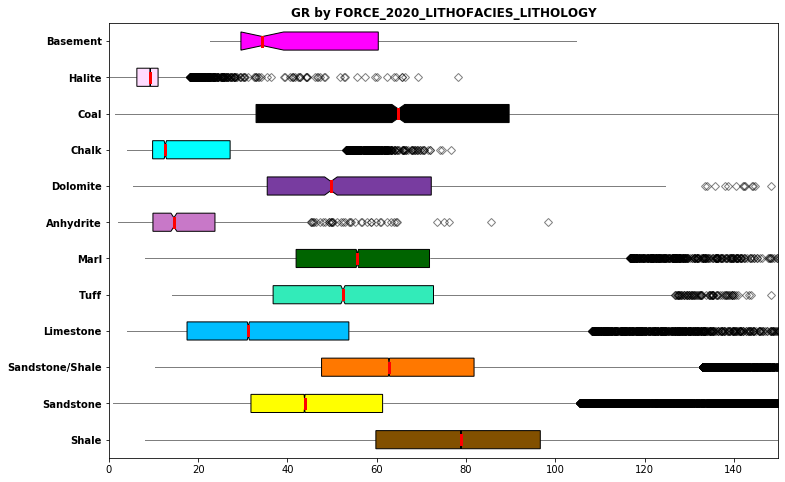

In [10]:
box_plot(df, log_dict, 'GR', 'FORCE_2020_LITHOFACIES_LITHOLOGY', litho_dict, 
         addendum_title=None, by_subset_list=None, figsize=None, save_plot=False)

by=FORCE_2020_LITHOFACIES_LITHOLOGY


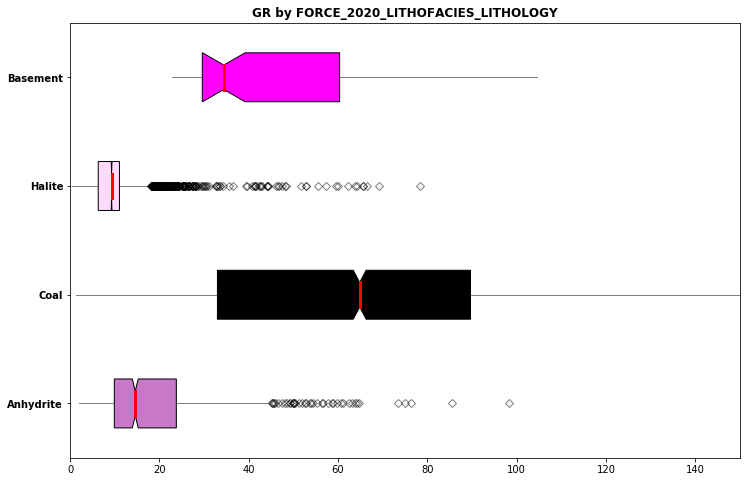

In [11]:
box_plot(df, log_dict, 'GR', 'FORCE_2020_LITHOFACIES_LITHOLOGY', litho_dict, 
         addendum_title=None, by_subset_list=seldom_lithologies, figsize=None, save_plot=False)

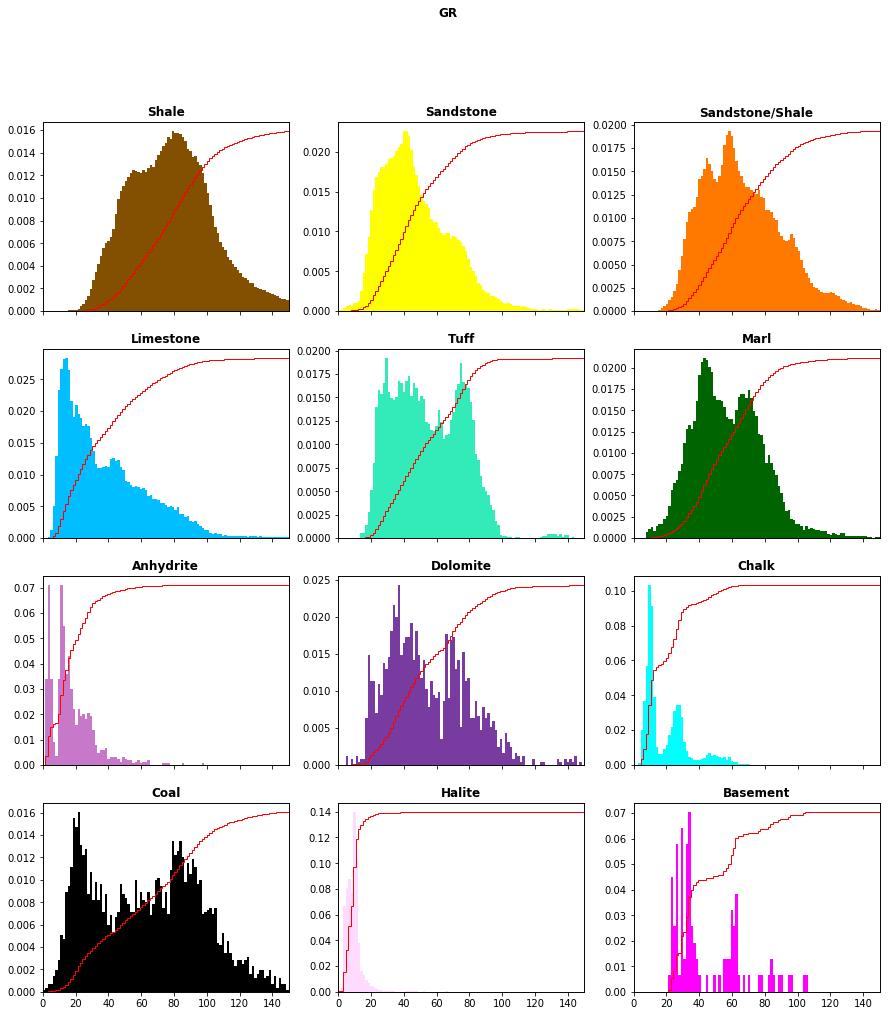

In [12]:
histogram_matrix(df, log_dict, 'GR', 'FORCE_2020_LITHOFACIES_LITHOLOGY', litho_dict, by_subset_list=None, figsize=None, save_plot=False)

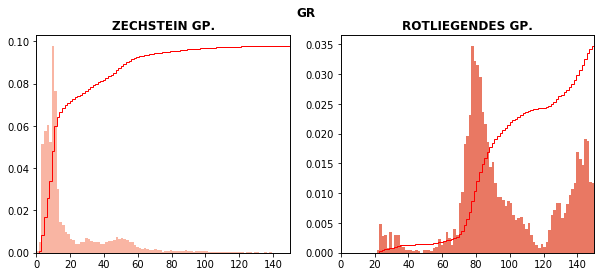

In [13]:
histogram_matrix(df.loc[(df.GROUP_num.notna())], log_dict, 'GR', 'GROUP_num', group_dict, by_subset_list=[13, 14], figsize=None, save_plot=False)

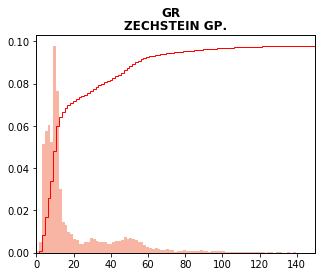

In [14]:
histogram_matrix(df.loc[(df.GROUP_num.notna())], log_dict, 'GR', 'GROUP_num', group_dict, by_subset_list=[13], figsize=None, save_plot=False)